In [19]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [20]:
df=pd.read_csv('canada_per_capita_income.csv')
df

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


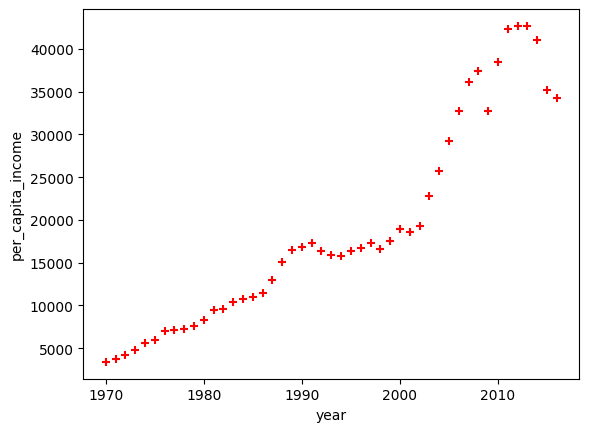

In [21]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per_capita_income')
plt.scatter(df.year,df.per_capita_income,color='red',marker='+')

drop a line

In [22]:

new_df = df.drop('per_capita_income',axis='columns')
new_df

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


pic=per capital income

In [23]:
pci = df.per_capita_income
pci

0      3399.299037
1      3768.297935
2      4251.175484
3      4804.463248
4      5576.514583
5      5998.144346
6      7062.131392
7      7100.126170
8      7247.967035
9      7602.912681
10     8355.968120
11     9434.390652
12     9619.438377
13    10416.536590
14    10790.328720
15    11018.955850
16    11482.891530
17    12974.806620
18    15080.283450
19    16426.725480
20    16838.673200
21    17266.097690
22    16412.083090
23    15875.586730
24    15755.820270
25    16369.317250
26    16699.826680
27    17310.757750
28    16622.671870
29    17581.024140
30    18987.382410
31    18601.397240
32    19232.175560
33    22739.426280
34    25719.147150
35    29198.055690
36    32738.262900
37    36144.481220
38    37446.486090
39    32755.176820
40    38420.522890
41    42334.711210
42    42665.255970
43    42676.468370
44    41039.893600
45    35175.188980
46    34229.193630
Name: per_capita_income, dtype: float64

In [25]:
reg = linear_model.LinearRegression()
reg.fit(new_df,pci)

LinearRegression()

In [27]:
reg.predict([[2020]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [28]:
reg.coef_

array([828.46507522])

In [29]:
reg.intercept_

-1632210.7578554575

Y = m * X + b (m is coefficient and b is intercept)

In [31]:
2020*828.46507522 +(-1632210.7578554575)

41288.694088942604

Generate CSV file with list of per capital income

In [32]:
year_df = pd.read_csv("year.csv")
year_df.head(3)

,year
0,2017
1,2018
2,2016


In [33]:
p = reg.predict(year_df)
p

array([38803.29886875, 39631.76394397, 37974.83379353, 41288.69409442,
       42945.62424486, 43774.08932009, 44602.55439531, 45431.01947053,
       74427.29710333])

In [34]:
year_df['per_capita_income']=p
year_df

,year,per_capita_income
0,2017,38803.298869
1,2018,39631.763944
2,2016,37974.833794
3,2020,41288.694094
4,2022,42945.624245
5,2023,43774.089320
6,2024,44602.554395
7,2025,45431.019471
8,2060,74427.297103


In [35]:
year_df.to_csv("prediction.csv")